In [3]:
import numpy as np
import pandas as pd
from db_handler import DBHandler
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from calendar import monthrange
%matplotlib inline

In [4]:
def parse_fetches(fetches):
    _new_fetches = list()
    for _fetch in fetches:
        for _doi in _fetch[0].split(", "):
            _new_fetches.append(
                (_doi, _fetch[1])
            )
    return _new_fetches

def get_dois_with_videos_within_days_from_publish(df, table_name, days_from=None, days_until=None):
    _set_target_dois = set()
    db_handler.sql_handler.select(table_name, ["idx_paper", "publishedAt"])
    fetches = db_handler.execute().fetchall()
    fetches = parse_fetches(fetches)
    
    for _row in fetches:
#         print("DOI:", _row[0])
        _target_paper = df[df["DOI"] == _row[0]]
#         if len(_target_paper) == 0:
#             continue
        if len(_target_paper) > 1:
            _target_paper = _target_paper.iloc[0]
        _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
        
        if days_from != None:
            _dt_video_from = _dt_publish + timedelta(days=days_from)
            if _row[1] < _dt_video_from:
                continue
        
        if days_until != None:
            _dt_video_until = _dt_publish + timedelta(days=days_until)
            if _row[1] > _dt_video_until:
                continue
        
        _set_target_dois.add(_row[0])
    
#     if days_until == None:
#         _set_target_dois = set(map(lambda _row: _row[0], fetches))
#     else:
#         for _row in fetches:
#             _target_paper = df[df["DOI"] == _row[0]]
#             if len(_target_paper) > 1:
#                 _target_paper = _target_paper.iloc[0]
#             _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
            
#             _dt_video_from = _dt_publish + timedelta(days=days_from)
#             _dt_video_until = _dt_publish + timedelta(days=days_until)
            
#             if _row[1] < _dt_video_deadline:
#                 _set_target_dois.add(_row[0])
    
    return _set_target_dois

In [27]:
df1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1901-1906.csv")
df2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1701-1706.csv")
df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1401-1406.csv")
print(len(df1), len(df2), len(df3))
df1 = df1.drop_duplicates(subset=["DOI"])
df2 = df2.drop_duplicates(subset=["DOI"])
df3 = df3.drop_duplicates(subset=["DOI"])
print(len(df1), len(df2), len(df3))

14533 11564 9598
14330 11353 9336


In [28]:
db_handler = DBHandler()
db_handler.sql_handler.select("scopus_videos_2014_comp", ["idx_paper", "publishedAt"])
_videos_2014 = db_handler.execute().fetchall()
db_handler.sql_handler.select("scopus_videos_2017_comp", ["idx_paper", "publishedAt"])
_videos_2017 = db_handler.execute().fetchall()
db_handler.sql_handler.select("scopus_videos_2019_comp", ["idx_paper", "publishedAt"])
_videos_2019 = db_handler.execute().fetchall()

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;


In [29]:
_idx_papers_2019 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp")
_idx_papers_2019_90 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp", None, 90)
print(len(_idx_papers_2019), len(_idx_papers_2019_90))
_idx_papers_2017 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp")
_idx_papers_2017_90 = get_dois_with_videos_within_days_from_publish(df2, "scopus_videos_2017_comp", None, 90)
print(len(_idx_papers_2017), len(_idx_papers_2017_90))
_idx_papers_2014 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp")
_idx_papers_2014_90 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp", None, 90)
print(len(_idx_papers_2014), len(_idx_papers_2014_90))

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
64 36
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
72 30
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
102 25


In [30]:
print(
    len(df1[df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna()),
    len(df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna())
)
print(df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna())

37 60
439      10.0
489      67.0
596      44.0
730       2.0
766       1.0
1558      3.0
2101      3.0
2108      2.0
2419      6.0
2450      1.0
2912      6.0
3051      9.0
3380      2.0
3586      2.0
3824      1.0
4050      3.0
5173      3.0
5181     97.0
5231    209.0
5250      7.0
5276    515.0
5318     22.0
5322    301.0
5352      2.0
5441      1.0
5448      1.0
5449      1.0
5453      1.0
5454      1.0
5461     25.0
5473      4.0
5474      2.0
5627      5.0
5708      1.0
5762      2.0
6513      2.0
6553      1.0
6626     28.0
6656     11.0
6739      4.0
6839      2.0
6866      6.0
6892      3.0
7534      4.0
7537      3.0
8154     84.0
8170     11.0
8224      2.0
8235     15.0
8237    171.0
8293     88.0
8335      5.0
8352     86.0
8357    269.0
8401      1.0
8524      1.0
9384    461.0
9386     21.0
9392     27.0
9403     21.0
Name: AAS, dtype: float64


/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [35]:
len(df1[df1["Cited by"].isna()]), len(df2[df2["Cited by"].isna()]), len(df3[df3["Cited by"].isna()])

(1273, 384, 314)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd58911ee48>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd589138630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd58912f048>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd589138cc0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd58911ef60>,
  <matplotlib.lines.Line2D at 0x7fd58b66d780>]}

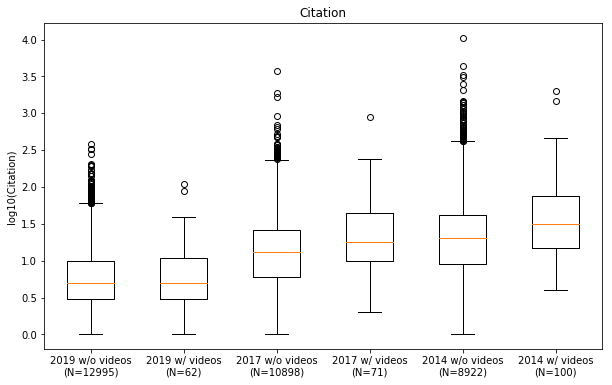

In [37]:
_2019_wo_videos_cit = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)]["Cited by"].dropna().astype(int))
_2019_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019)]["Cited by"].dropna().astype(int))
_2017_wo_videos_cit = np.log10(df2[~df2.DOI.isin(_idx_papers_2017)]["Cited by"].dropna().astype(int))
_2017_w_videos_cit = np.log10(df2[df2.DOI.isin(_idx_papers_2017)]["Cited by"].dropna().astype(int))
_2014_wo_videos_cit = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)]["Cited by"].dropna().astype(int))
_2014_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014)]["Cited by"].dropna().astype(int))

plt.figure(figsize=(10, 6))
plt.title("Citation")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2019_wo_videos_cit,
    _2019_w_videos_cit,
    _2017_wo_videos_cit,
    _2017_w_videos_cit,
    _2014_wo_videos_cit,
    _2014_w_videos_cit
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_cit),
        "2019 w/ videos\n(N=%s)"%len(_2019_w_videos_cit),
        "2017 w/o videos\n(N=%s)"%len(_2017_wo_videos_cit),
        "2017 w/ videos\n(N=%s)"%len(_2017_w_videos_cit),
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_cit),
        "2014 w/ videos\n(N=%s)"%len(_2014_w_videos_cit)
    ]
)

In [38]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_w_videos_cit
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_cit,
    _2017_w_videos_cit
)
print("2017\tS = %f\tp = %f"%(_s2017, _p2017))

_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_w_videos_cit
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = -1.385324	p = 0.165977
2017	S = -3.727217	p = 0.000195
2014	S = -5.486023	p = 0.000000


/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed

{'boxes': [<matplotlib.lines.Line2D at 0x7fd588fc1c18>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd588fb1400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd588fb1dd8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd588fb1a90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd588fc1d30>,
  <matplotlib.lines.Line2D at 0x7fd588f9d550>]}

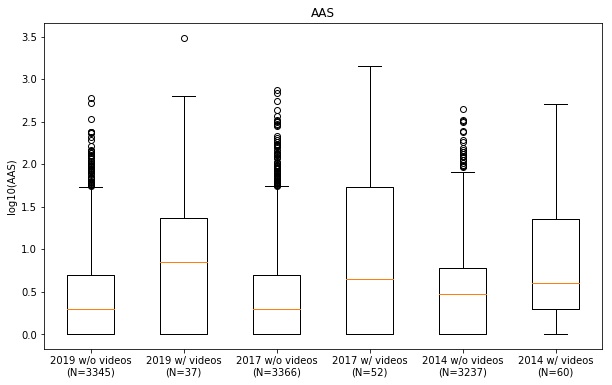

In [39]:
# _2019_wo_videos = df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2019_w_videos = df1[df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2017_wo_videos = df2[~df2.DOI.isin(_idx_papers_2017)][df2["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2017_w_videos = df2[df2.DOI.isin(_idx_papers_2017)][df2["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2014_wo_videos = df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2014_w_videos = df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)

_2019_wo_videos_aas = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2017_wo_videos_aas = np.log10(df2[~df2.DOI.isin(_idx_papers_2017)][df2["AAS"] != "None"]["AAS"].dropna().astype(int))
_2017_w_videos_aas = np.log10(df2[df2.DOI.isin(_idx_papers_2017)][df2["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_wo_videos_aas = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(10, 6))
plt.title("AAS")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2019_wo_videos_aas,
    _2019_w_videos_aas,
    _2017_wo_videos_aas,
    _2017_w_videos_aas,
    _2014_wo_videos_aas,
    _2014_w_videos_aas
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_aas),
        "2019 w/ videos\n(N=%s)"%len(_2019_w_videos_aas),
        "2017 w/o videos\n(N=%s)"%len(_2017_wo_videos_aas),
        "2017 w/ videos\n(N=%s)"%len(_2017_w_videos_aas),
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_aas),
        "2014 w/ videos\n(N=%s)"%len(_2014_w_videos_aas)
    ]
)

In [40]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_w_videos_aas
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2017, _p2017 = stats.ttest_ind(
    _2017_wo_videos_aas,
    _2017_w_videos_aas
)
print("2017\tS = %f\tp = %f"%(_s2017, _p2017))

_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_w_videos_aas
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = -6.404854	p = 0.000000
2017	S = -8.513059	p = 0.000000
2014	S = -6.785119	p = 0.000000


AAS는 citation보다 일찍 유의차를 보임: 2019 p=0

論文掲載初期動画付きの場合

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed

{'boxes': [<matplotlib.lines.Line2D at 0x7fd589038358>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd589038b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd589032518>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd5890321d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd589038470>,
  <matplotlib.lines.Line2D at 0x7fd589327c50>]}

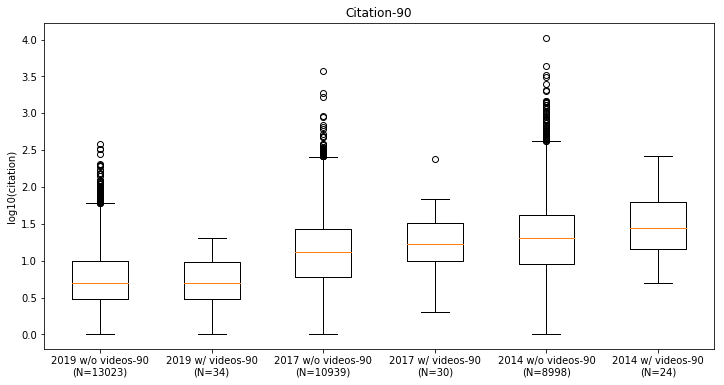

In [41]:
# _2019_90_wo_videos_cit = df1[~df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2019_90_w_videos_cit = df1[df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2017_90_wo_videos_cit = df2[~df2.DOI.isin(_idx_papers_2017_90)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2017_90_w_videos_cit = df2[df2.DOI.isin(_idx_papers_2017_90)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2014_90_wo_videos_cit = df3[~df3.DOI.isin(_idx_papers_2014_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int)
# _2014_90_w_videos_cit = df3[df3.DOI.isin(_idx_papers_2014_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int)

_2019_90_wo_videos_cit = np.log10(df1[~df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_90_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2017_90_wo_videos_cit = np.log10(df2[~df2.DOI.isin(_idx_papers_2017_90)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2017_90_w_videos_cit = np.log10(df2[df2.DOI.isin(_idx_papers_2017_90)][df2["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_90_wo_videos_cit = np.log10(df3[~df3.DOI.isin(_idx_papers_2014_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_90_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("Citation-90")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(citation)")
plt.boxplot([
    _2019_90_wo_videos_cit,
    _2019_90_w_videos_cit,
    _2017_90_wo_videos_cit,
    _2017_90_w_videos_cit,
    _2014_90_wo_videos_cit,
    _2014_90_w_videos_cit
],
    labels=[
        "2019 w/o videos-90\n(N=%s)"%len(_2019_90_wo_videos_cit),
        "2019 w/ videos-90\n(N=%s)"%len(_2019_90_w_videos_cit),
        "2017 w/o videos-90\n(N=%s)"%len(_2017_90_wo_videos_cit),
        "2017 w/ videos-90\n(N=%s)"%len(_2017_90_w_videos_cit),
        "2014 w/o videos-90\n(N=%s)"%len(_2014_90_wo_videos_cit),
        "2014 w/ videos-90\n(N=%s)"%len(_2014_90_w_videos_cit)
    ]
)

In [42]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_90_wo_videos_cit,
    _2019_90_w_videos_cit
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2017, _p2017 = stats.ttest_ind(
    _2017_90_wo_videos_cit,
    _2017_90_w_videos_cit
)
print("2017\tS = %f\tp = %f"%(_s2017, _p2017))

_s2014, _p2014 = stats.ttest_ind(
    _2014_90_wo_videos_cit,
    _2014_90_w_videos_cit
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = 0.276240	p = 0.782368
2017	S = -1.710880	p = 0.087132
2014	S = -1.931490	p = 0.053454


논문 게재 초기(90일 이내) 비디오로 한정하면 p값이 커짐. 즉 초기 비디오 유무에 따른 피인용수의 유의차는 없다.

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed

{'boxes': [<matplotlib.lines.Line2D at 0x7fd5893214e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd589321cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd58900e6d8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd58900e390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd589321630>,
  <matplotlib.lines.Line2D at 0x7fd588ff6e10>]}

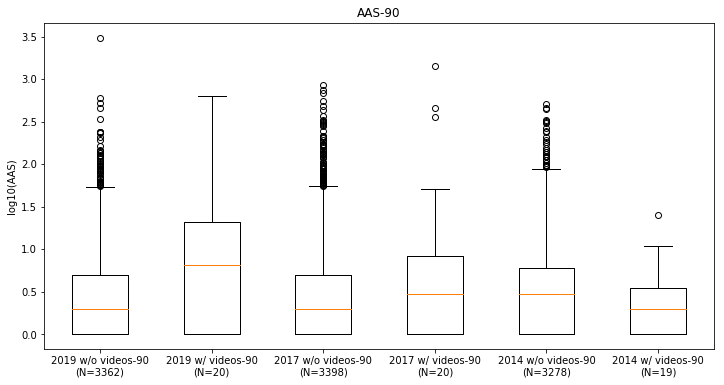

In [43]:
# _2019_90_wo_videos_aas = df1[~df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2019_90_w_videos_aas = df1[df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2017_90_wo_videos_aas = df2[~df2.DOI.isin(_idx_papers_2017_90)][df2["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2017_90_w_videos_aas = df2[df2.DOI.isin(_idx_papers_2017_90)][df2["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2014_90_wo_videos_aas = df3[~df3.DOI.isin(_idx_papers_2014_90)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)
# _2014_90_w_videos_aas = df3[df3.DOI.isin(_idx_papers_2014_90)][df3["AAS"] != "None"]["AAS"].dropna().astype(int)

_2019_90_wo_videos_aas = np.log10(df1[~df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_90_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2017_90_wo_videos_aas = np.log10(df2[~df2.DOI.isin(_idx_papers_2017_90)][df2["AAS"] != "None"]["AAS"].dropna().astype(int))
_2017_90_w_videos_aas = np.log10(df2[df2.DOI.isin(_idx_papers_2017_90)][df2["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_90_wo_videos_aas = np.log10(df3[~df3.DOI.isin(_idx_papers_2014_90)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_90_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_90)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("AAS-90")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2019_90_wo_videos_aas,
    _2019_90_w_videos_aas,
    _2017_90_wo_videos_aas,
    _2017_90_w_videos_aas,
    _2014_90_wo_videos_aas,
    _2014_90_w_videos_aas
],
    labels=[
        "2019 w/o videos-90\n(N=%s)"%len(_2019_90_wo_videos_aas),
        "2019 w/ videos-90\n(N=%s)"%len(_2019_90_w_videos_aas),
        "2017 w/o videos-90\n(N=%s)"%len(_2017_90_wo_videos_aas),
        "2017 w/ videos-90\n(N=%s)"%len(_2017_90_w_videos_aas),
        "2014 w/o videos-90\n(N=%s)"%len(_2014_90_wo_videos_aas),
        "2014 w/ videos-90\n(N=%s)"%len(_2014_90_w_videos_aas)
    ]
)

In [44]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_90_wo_videos_aas,
    _2019_90_w_videos_aas
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2017, _p2017 = stats.ttest_ind(
    _2017_90_wo_videos_aas,
    _2017_90_w_videos_aas
)
print("2017\tS = %f\tp = %f"%(_s2017, _p2017))

_s2014, _p2014 = stats.ttest_ind(
    _2014_90_wo_videos_aas,
    _2014_90_w_videos_aas
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = -4.033318	p = 0.000056
2017	S = -3.070593	p = 0.002153
2014	S = 1.276849	p = 0.201746


피인용수와 달리, 초기 비디오 유무는 AAS에 대해서 영향력이 있어 보임.
다만 과거 논문일수록 유의성이 떨어지는 경향. 2014엔 유의하지 않음. -> 가설:과거엔 대중적인지(AAS)가 활성화되지 않음? -> 관계 논문이 있으면 찾아보고, 그의 뒷받침 자료로도 설명할 수 있음